naive T cells $T_N$
STM T cells $T_{STM}$
infected cells I
healthy cells STM
$I\rightarrow^\delta $ death

In [ ]:
def dTN_dt(alpha,I):
    dTN=-alpha*I
    return dTN

def dSTM_dt(alpha,I):
    dSTM=alpha*I
    return dSTM

def dI_dt(beta,delta,delta_N,delta_STM,S,I,TN,STM):
    dI = beta*S*I-delta*I-delta_N*TN*I-delta_STM*STM*I
    cost = -delta*I-delta_N*TN*I-delta_STM*STM*I
    return dI,cost

def dS_dt(beta,dN,dSTM,S,I,TN,STM):
    dS = -beta*S*I-dN*TN*S-dSTM*STM*S
    cost = -dN*TN*S-dSTM*STM*S
    return dS,cost

Final cumulative cost: 19089.6


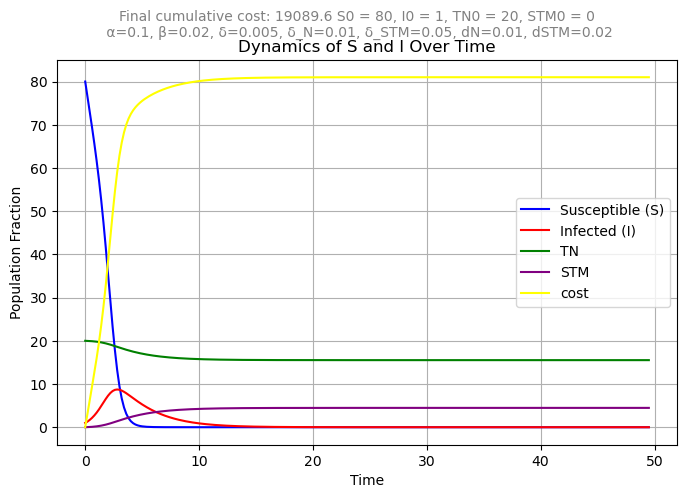

In [62]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(t, y, alpha, beta, delta, delta_N, delta_STM, dN, dSTM):
    S, I, TN, STM, cost = y  # Unpack state variables
    
    S = max(S, 0)
    I = max(I, 0)
    TN = max(TN, 0)
    STM = max(STM, 0)
    
    # Compute derivatives
    dTN = -alpha * I
    dSTM = alpha * I
    dI = beta * S * I - delta * I - delta_N * TN * I - delta_STM * STM * I
    dS = -beta * S * I - dN * TN * S - dSTM * STM * S
    
    # Compute instantaneous cost
    cost_I = -delta * I - delta_N * TN * I - delta_STM * STM * I
    cost_S = -dN * TN * S - dSTM * STM * S
    dCost = np.abs(cost_I + cost_S)  # Total cost at this step
    return [dS, dI, dTN, dSTM, dCost]

def event_I_zero(t, y, alpha, beta, delta, delta_N, delta_STM, dN, dSTM):
    I = y[1]  # Extract the infected population
    threshold = 1e-6  # Define a small threshold to stop the simulation
    return I - threshold # Stop when I = 0

event_I_zero.terminal = True  # Stop the simulation when event occurs
event_I_zero.direction = -1   # Trigger only when I is decreasing to 0

# Parameters
alpha = 0.1
beta = 0.02
delta = 0.005
delta_N = 0.01
delta_STM = 0.05
dN = 0.01
dSTM = 0.02

# Initial conditions: S0, I0, TN0, STM0, cost0
y0 = [80, 1, 20, 0, 0]

# Time span
t_span = (0, 100)  # Simulate from t=0 to t=50
t_eval = np.linspace(0, 100, 500)  # Time points for evaluation

# Solve the ODE system
# solution = solve_ivp(system, t_span, y0, args=(alpha, beta, delta, delta_N, delta_STM, dN, dSTM), t_eval=t_eval)
# solution = solve_ivp(system, t_span, y0, args=(alpha, beta, delta, delta_N, delta_STM, dN, dSTM),
                    #  t_eval=t_eval, method='RK45')
solution = solve_ivp(system, t_span, y0, args=(alpha, beta, delta, delta_N, delta_STM, dN, dSTM),
                     t_eval=t_eval, method='RK45', events=event_I_zero)

# Extract results
t_values = solution.t
S_values, I_values, TN_values, STM_values, cumulative_cost = solution.y

# Print final cumulative cost
# print(f"Final cumulative cost: {cumulative_cost[-1]}")
print(f"Final cumulative cost: {np.round(np.sum(cumulative_cost),2)}")
sub_text1=(f'Final cumulative cost: {np.round(np.sum(cumulative_cost),2)} S0 = {y0[0]}, I0 = {y0[1]}, TN0 = {y0[2]}, STM0 = {y0[3]}\n α={alpha}, β={beta}, δ={delta}, δ_N={delta_N}, δ_STM={delta_STM}, dN={dN}, dSTM={dSTM}')
subtitle_text = (f"α={alpha}, β={beta}, δ={delta}, δ_N={delta_N}, δ_STM={delta_STM}, "
                 f"d_N={dN}, d_STM={dSTM}")
plt.figure(figsize=(8, 5))
plt.plot(t_values, S_values, label="Susceptible (S)", color='blue')
plt.plot(t_values, I_values, label="Infected (I)", color='red')
plt.plot(t_values, TN_values, label="TN", color='green')
plt.plot(t_values, STM_values, label="STM", color='purple')
plt.plot(t_values, cumulative_cost, label="cost", color='yellow')
plt.xlabel("Time")
plt.ylabel("Population Fraction")
plt.title(f"Dynamics of S and I Over Time")
plt.suptitle(sub_text1, fontsize=10, color='gray')
plt.legend()
plt.grid()
plt.show()



In [ ]:
import dash 
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objs as go

def system(t, y, alpha, beta, delta, delta_N, delta_STM, dN, dSTM):
    S, I, TN, STM, cost = y  # Unpack state variables
    
    S = max(S, 0)
    I = max(I, 0)
    TN = max(TN, 0)
    STM = max(STM, 0)
    
    # Compute derivatives
    dTN = -alpha * I
    dSTM = alpha * I
    dI = beta * S * I - delta * I - delta_N * TN * I - delta_STM * STM * I
    dS = -beta * S * I - dN * TN * S - dSTM * STM * S
    
    # Compute instantaneous cost
    cost_I = -delta * I - delta_N * TN * I - delta_STM * STM * I
    cost_S = -dN * TN * S - dSTM * STM * S
    dCost = np.abs(cost_I + cost_S)  # Total cost at this step
    return [dS, dI, dTN, dSTM, dCost]

def event_I_zero(t, y, alpha, beta, delta, delta_N, delta_STM, dN, dSTM):
    I = y[1]  # Extract the infected population
    threshold = 1e-6  # Define a small threshold to stop the simulation
    return I - threshold # Stop when I = 0

event_I_zero.terminal = True  # Stop the simulation when event occurs
event_I_zero.direction = -1   # Trigger only when I is decreasing to 0


# Time span
t_span = (0, 100)  # Simulate from t=0 to t=50
t_eval = np.linspace(0, 100, 500)  # Time points for evaluation
# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("STM system 1"),

    html.Div([
        # LEFT COLUMN
        html.Div([
            html.Label("S0:"),
            dcc.Slider(id='S0', min=0, max=100, step=1, value=98,
                       marks={int(i): str(i) for i in range(0, 101, 10)}),
            html.Label("I0:"),
            dcc.Slider(id='I0', min=0, max=10, step=0.1, value=1,
                       marks={int(i): str(i) for i in range(0, 11, 2)}),
            html.Label("TN0:"),
            dcc.Slider(id='TN0', min=0, max=100, step=1, value=20,
                       marks={int(i): str(i) for i in range(0, 101, 10)}),
            html.Label("STM0:"),
            dcc.Slider(id='STM0', min=0, max=100, step=1, value=0,
                       marks={int(i): str(i) for i in range(0, 101, 10)}),

            # Insert LaTeX-style equations
            html.Div([
                dcc.Markdown("dTN/dt=-α*I"),
                dcc.Markdown("dSTM/dt=α*I"),
                dcc.Markdown("dI/dt=β\*S\*I-δ\*I-δN\*TN\*I-δSTM\*STM\*I"),
                dcc.Markdown("dS/dt=-β\*S\*I-dN\*TN\*S-dSTM\*STM\*S")
            ], style={'marginTop': '30px'})
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        # RIGHT COLUMN (sliders only)
        html.Div([
            html.Label("α: TN to STM"),
            dcc.Slider(id='alpha', min=0, max=0.1, step=0.01, value=0.05,
                       marks={round(i, 2): f"{i:.2f}" for i in np.linspace(0, 0.1, 6)}),
            html.Label("β: Infectivity"),
            dcc.Slider(id='beta', min=0, max=0.06, step=0.001, value=0.017,
                       marks={round(i, 3): f"{i:.3f}" for i in np.linspace(0, 0.06, 6)}),
            html.Label("δ: Infected cell death"),
            dcc.Slider(id='delta', min=0, max=0.04, step=0.001, value=0.02,
                       marks={round(i, 3): f"{i:.3f}" for i in np.linspace(0, 0.04, 6)}),
            html.Label("δ_TN: Infected cell death by TN"),
            dcc.Slider(id='delta_N', min=0, max=0.1, step=0.001, value=0.05,
                       marks={round(i, 2): f"{i:.2f}" for i in np.linspace(0, 0.1, 6)}),
            html.Label("δ_STM: Infected cell death by STM"),
            dcc.Slider(id='delta_STM', min=0, max=0.1, step=0.001, value=0.05,
                       marks={round(i, 3): f"{i:.3f}" for i in np.linspace(0, 0.1, 6)}),
            html.Label("d_TN: Susceptible cell death by TN"),
            dcc.Slider(id='dN', min=0, max=0.002, step=0.001, value=0.001,
                       marks={round(i, 4): f"{i:.4f}" for i in np.linspace(0, 0.002, 6)}),
            html.Label("d_STM: Susceptible cell death by STM"),
            dcc.Slider(id='dSTM', min=0, max=0.002, step=0.001, value=0.001,
                       marks={round(i, 4): f"{i:.4f}" for i in np.linspace(0, 0.002, 6)}),
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'})
    ]),

    html.Br(),
    # dcc.Graph(id='output-graph')
    dcc.Graph(id='output-graph', style={'height': '1000px', 'width': '100%'})
])
# Callback to update the plot
@app.callback(
    Output('output-graph', 'figure'),
    [Input('S0', 'value'),Input('I0', 'value'),Input('TN0', 'value'),Input('STM0', 'value'),Input('alpha', 'value'), Input('beta', 'value'), Input('delta', 'value'),
     Input('delta_N', 'value'), Input('delta_STM', 'value'), Input('dN', 'value'),
     Input('dSTM', 'value')]
)
# def update_graph(alpha, beta, delta, delta_N, delta_STM, dN, dSTM,S0,I0,TN0,STM0):
def update_graph(S0, I0, TN0, STM0, alpha, beta, delta, delta_N, delta_STM, dN, dSTM):
    y0=[S0,I0,TN0,STM0,0]
    sol = solve_ivp(system, t_span, y0, args=(alpha, beta, delta, delta_N, delta_STM, dN, dSTM),
                     t_eval=t_eval, method='RK45', events=event_I_zero)
    
    # Extract solutions
    t_values = sol.t
    # X, c = sol.y
    S_values, I_values, TN_values, STM_values, cumulative_cost = sol.y

    title_text = 'Dynamics of Infection Over Time'
    sub_text1=(f'Final cumulative cost: {np.round(np.sum(cumulative_cost),2)} S0 = {y0[0]}, I0 = {y0[1]}, TN0 = {y0[2]}, STM0 = {y0[3]}')
    sub_text2=(f' α={alpha}, β={beta}, δ={delta}, δ_N={delta_N}, δ_STM={delta_STM}, dN={dN}, dSTM={dSTM}')
    
    subtitle_text = (f"α={alpha}, β={beta}, δ={delta}, δ_N={delta_N}, δ_STM={delta_STM}, "
                    f"d_N={dN}, d_STM={dSTM}")
    # Create the plot
    figure = go.Figure()
    figure.add_trace(go.Scatter(x=t_values, y=S_values,name="Susceptible (S)",line=dict(width=4)))
    figure.add_trace(go.Scatter(x=t_values, y=I_values, name="Infected (I)",line=dict(width=4)))
    figure.add_trace(go.Scatter(x=t_values, y=TN_values, name="TN",line=dict(width=4)))
    figure.add_trace(go.Scatter(x=t_values, y=STM_values, name="STM",line=dict(width=4)))
    figure.add_trace(go.Scatter(x=t_values, y=cumulative_cost, name="cost",line=dict(width=4)))

    # sub_text1=(f'Final cumulative cost: {np.round(np.sum(cumulative_cost),2)} S0 = {y0[0]}, I0 = {y0[1]}, TN0 = {y0[2]}, STM0 = {y0[3]}\n α={alpha}, β={beta}, δ={delta}, δ_N={delta_N}, δ_STM={delta_STM}, dN={dN}, dSTM={dSTM}')
    subtitle_text = (f"α={alpha}, β={beta}, δ={delta}, δ_N={delta_N}, δ_STM={delta_STM}, "
                    f"d_N={dN}, d_STM={dSTM}")


    figure.add_annotation(
        x=0.5, y=1.08, xref="paper", yref="paper", showarrow=False,
        text=sub_text1, font=dict(size=24), align="center"
    )
    figure.add_annotation(
        x=0.5, y=1.03, xref="paper", yref="paper", showarrow=False,
        text=sub_text2, font=dict(size=24), align="center"
    )
    figure.add_annotation(
        x=0.5, y=1.13, xref="paper", yref="paper", showarrow=False,
        text=title_text, font=dict(size=28), align="center"
    )


    figure.update_layout(
    # title="Dynamics of Infection Over Time",
    title_font=dict(size=24),  # Adjust title font size
    xaxis_title="Time",
    yaxis_title="Population",
    xaxis_title_font=dict(size=28),  # Adjust x-axis title font size
    yaxis_title_font=dict(size=28),  # Adjust y-axis title font size
    xaxis=dict(tickfont=dict(size=20)),  # Adjust x-axis tick labels font size
    yaxis=dict(tickfont=dict(size=20)),  # Adjust y-axis tick labels font size
    legend=dict(
        font=dict(size=28)  # Change the font size of the legend text
    ),
    template="plotly_white"
)
    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)